Importing library

In [115]:
import pandas as pd

In [116]:
cars_df=pd.read_csv('cars-dataset.csv')

In [117]:
cars_df.head(2)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0


1)EDA & Pre-processing

In [118]:
print("This dataset has",cars_df.shape[0],"rows.")
print("This dataset has",cars_df.shape[1],"cloumns.")

This dataset has 398 rows.
This dataset has 8 cloumns.


In [119]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

The column "hp" is supposed to be numeric columnn but it's datatype is object which means there's irrelevant value present/value absent in the column.So checking for any missing or NaN values in this column.

In [120]:
cars_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

As checked above there seems to be no "NaN" values but then what exactly is causing it to identify it as an 'object' dtype.

In [121]:
cars_df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

As seen above there seems to be the '?' at some location rather than a numeric value.Hence replacing the values at the above locations.

In [122]:
import numpy as np
cars_df['hp']=cars_df['hp'].replace('?',np.nan)

Checking the NaN values presence after the replacement operation.

In [123]:
cars_df.isna().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [124]:
cars_df[cars_df['hp'].isna()]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


Repalcing the NaN values by median 

In [125]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median')
cars_df.iloc[:,3:4]=imp.fit_transform(cars_df.iloc[:,3:4])

Now there's no NaN values as checked still we'll check data types jsut to reconfirm.

In [126]:
cars_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [127]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


Now this confirms the data processing is being done.

The mean & median seems almost approximately equal.

In [128]:
cars_df.skew()

cyl     0.526922
disp    0.719645
hp      1.106224
wt      0.531063
acc     0.278777
yr      0.011535
mpg     0.457066
dtype: float64

The skewness seems to be positive which means all the columns have right tail wherein the skewness is too small to affect the data on a noticeable magnitude.

In [129]:
cars_df=cars_df.select_dtypes(exclude=object)

In [130]:
cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [131]:
cars_df.drop(columns='yr',inplace=True)

Since the data units are mixed let's standardize the data using "Z-score"

In [132]:
from scipy.stats import zscore

cars_z = cars_df.apply(zscore)

In [133]:
cars_z.shape[0]

398

2) Using pair plot to visualize how the different variables are related.

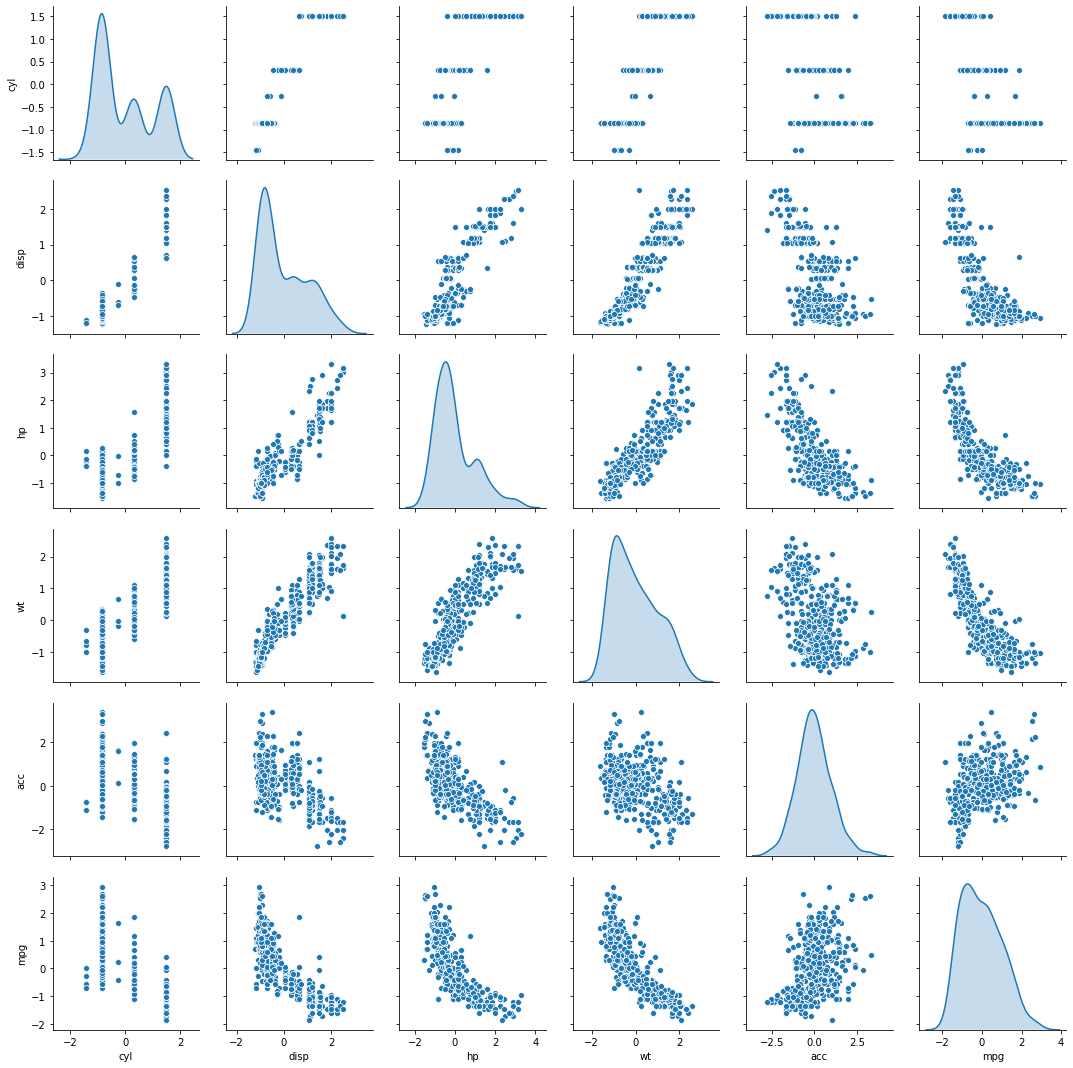

In [134]:
import seaborn as sns
sns.pairplot(cars_z,diag_kind='kde')

The amount of Gaussian curves in the pairplot shows that atleast 3 clusters might be present in the dataset.


3) Using K means to check the number of clusters present & visual analysis of the same can be done by using the Elbow plot.

In [135]:
cluster_errors=[]
cluster_sil_scores=[]
distortion=[]

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance
#importing cluster of diff. sizes to check for erros
cluster_range=range(1,10)

for i in cluster_range:
    clusters=KMeans(i,n_init=5)
    clusters.fit(cars_z)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    distortion.append(sum(np.min(distance.cdist(cars_z, centroids, 'euclidean'), axis=1))/ cars_z.shape[0])
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors,"dist":distortion} )
clusters_df[0:20]



,num_clusters,cluster_errors,dist
0,1,2388.000000,2.228510
1,2,944.289955,1.404739
2,3,609.265388,1.108443
3,4,492.519413,1.000878
4,5,423.323816,0.919932
5,6,366.479312,0.859148
6,7,333.621533,0.824023
7,8,303.382111,0.785290
8,9,286.022549,0.761428


Plotting the elbow plot so as to get a visual depiction of the optimal number of clusters

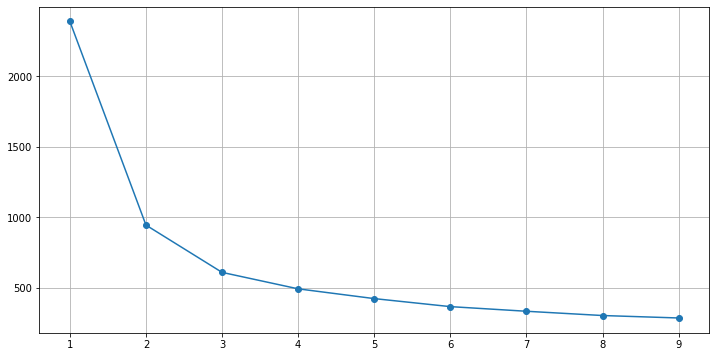

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid()

3 or 4 seems to be an optimal number of clusters.

In [137]:
prediction=clusters.predict(cars_z)
cars_z['group']=prediction

Checking with 3 clusters first

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A7F9E83E48>,
      dtype=object)

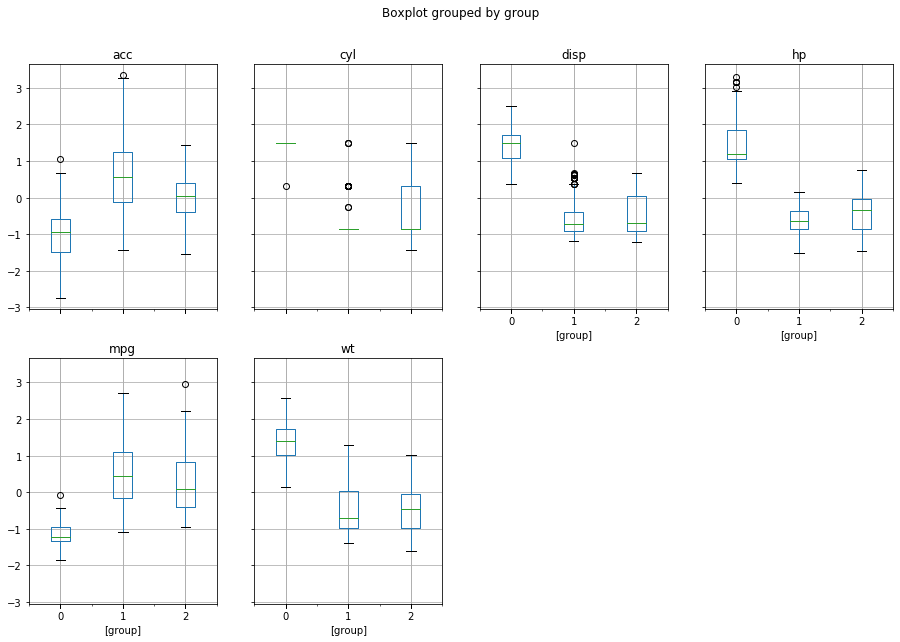

In [138]:
finalclusters=KMeans(3,n_init=5)
finalclusters.fit(cars_z)
prediction=finalclusters.predict(cars_z)
cars_z['group']=prediction
cars_z.boxplot(by='group',layout=(2,4),figsize=(15,10))

Boxes seem to be overlapping each other & a lot of outliers are present as well.Hence treating the outliers.

In [139]:
# Addressing outliers at group level

data = cars_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median() # replacing group outliers with group median      
    return group

data_corrected = (data.groupby('group').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_z['group']))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Since I've removed outliers and replace with median.There seems to be a clean graph with less overlapping after treating the outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A7FAB8CCC0>,
      dtype=object)

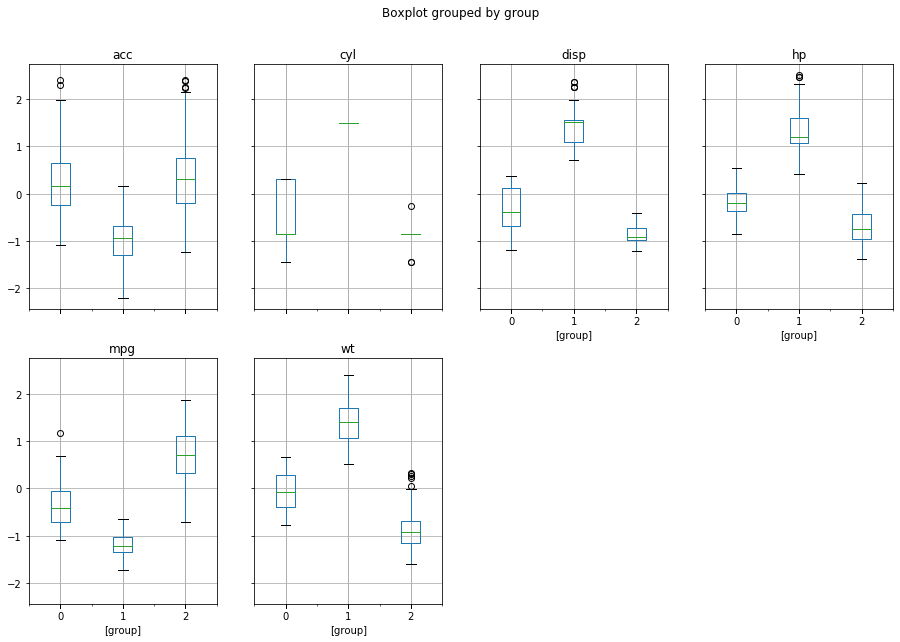

In [140]:
finalclusters=KMeans(3,n_init=5)
finalclusters.fit(concat_data)
prediction=finalclusters.predict(concat_data)
concat_data['group']=prediction
concat_data.boxplot(by='group',layout=(2,4),figsize=(15,10))

Checking with 4 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A7FB2DE748>,
      dtype=object)

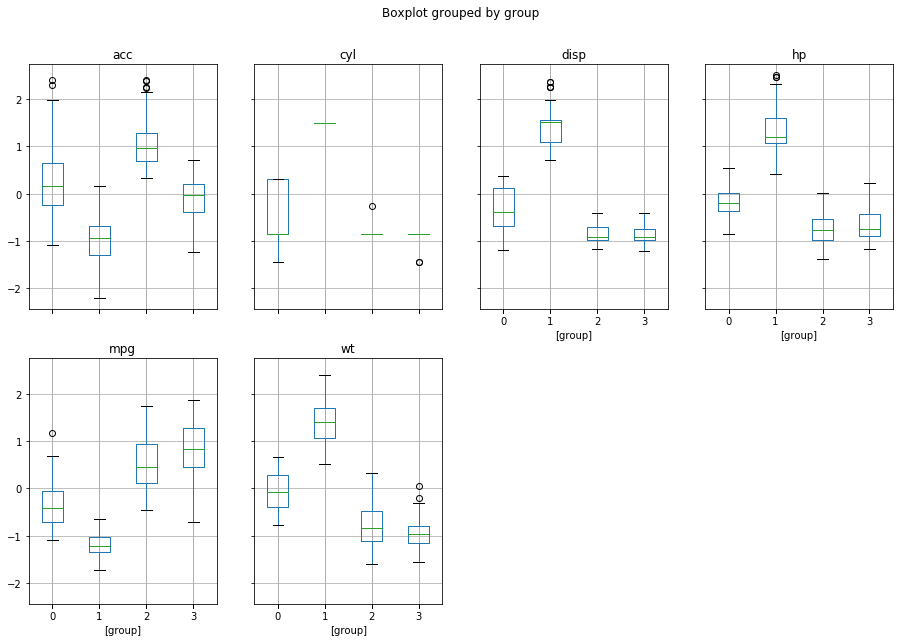

In [141]:
finalclusters=KMeans(4,n_init=5)
finalclusters.fit(concat_data)
prediction=finalclusters.predict(concat_data)
concat_data['group']=prediction
concat_data.boxplot(by='group',layout=(2,4),figsize=(15,10))

Thus 4 clusters prove to be more better clusters since the cluster's denoted in the form of group are more distinct than in the 3 cluster K means.

4) Using linear regression model on different clusters separately and printing the coefficients of the models individually

In [142]:
cars1_df=concat_data[concat_data['group']==0]

In [143]:
#mpg will be the target column 
X1=cars1_df.drop(columns=['mpg','group'])
y1=cars1_df[['mpg']]

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[-0.15542088  0.2049871  -0.04717555 -0.10501753 -0.24126599]]
The score of the model: -0.16435172426969857


In [145]:
cars2_df=concat_data[concat_data['group']==1]

In [146]:
X2=cars2_df.drop(columns=['mpg','group'])
y2=cars2_df[['mpg']]

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[ 0.01236524 -0.08183219 -0.13328976 -0.12875509 -0.06911772]]
The score of the model: 0.19510646133662324


In [148]:
cars3_df=concat_data[concat_data['group']==2]

In [149]:
X3=cars3_df.drop(columns=['mpg','group'])
y3=cars3_df[['mpg']]

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X3,y3,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[ 0.06603745 -1.64258662 -0.57683562  0.61446691  0.00196536]]
The score of the model: -0.03883560909386463


In [151]:
cars4_df=concat_data[concat_data['group']==3]

In [152]:
X4=cars4_df.drop(columns=['mpg','group'])
y4=cars4_df[['mpg']]

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X4,y4,test_size=0.3)
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",lreg.coef_)
print("The score of the model:",score)

The coefficients of the model are: [[ 0.81254914  0.08305828 -0.51279169  0.06913226  0.07549442]]
The score of the model: 0.20178498144013723


Since the cluster has even less number of datapoints then the accuracy is further reduced.Trying regularized linear model. on directly the last cluster to check performance improvement.

In [154]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=.03)
rd.fit(X_train,y_train)
y_pred=rd.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",rd.coef_)
print("The score of the model:",score)


The coefficients of the model are: [[ 0.72303387  0.10448041 -0.51295     0.05818751  0.08047389]]
The score of the model: 0.19482799995937183


In [155]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.005)
ls.fit(X_train,y_train)
y_pred=ls.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("The coefficients of the model are:",ls.coef_)
print("The score of the model:",score)


The coefficients of the model are: [ 0.          0.00590605 -0.42946465  0.          0.08806127]
The score of the model: 0.09149330577679737


There are coefficients which are zeroed which means dimensinality is reduced after which the accuracy has improved significantly. 